Dataset(rows, columns): (1100, 21)

Columns:
['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']


level 0 results
----------------
Descriptive Statistics
---------------------
How many students are in the dataset? 1100
How many students have reported a history of mental health issues? 542
What is the average anxiety level of students in the dataset? 11.06


level 1 results
---------------
Psychological Factors
---------------------
How many students have a self-esteem level below the average? 507
What percentage of students have reported experiencing depression? 96.0 %


Physiological Factors
---------------------
How many students experience headaches 

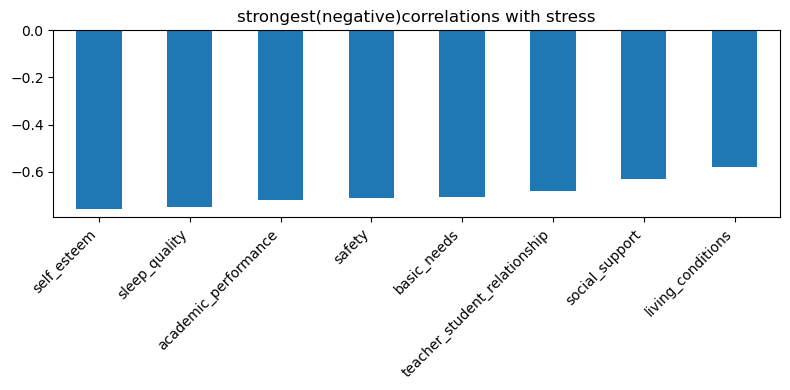

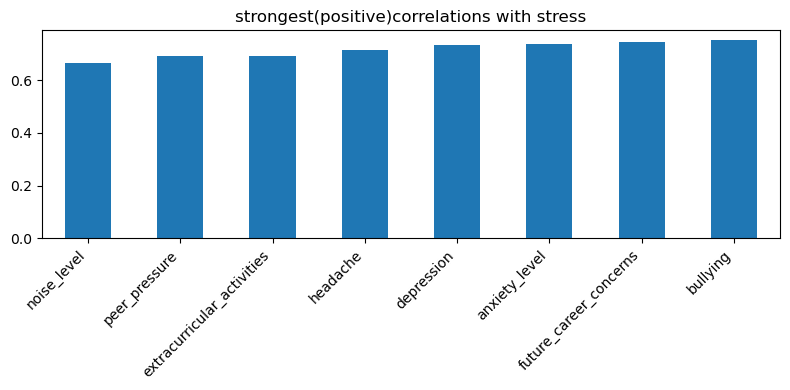

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df=pd.read_csv(r"c:\Users\ryand\Downloads\StressLevelDataset.csv")
print("Dataset(rows, columns):", df.shape)
print("\nColumns:")
print(df.columns.tolist())
print("\n")

n_students=len(df)
m_history_count=(df["mental_health_history"]==1).sum()
a_anxiety=df["anxiety_level"].mean()
print("level 0 results")
print("----------------")
print("Descriptive Statistics")
print("---------------------")
print("How many students are in the dataset?", n_students)
print("How many students have reported a history of mental health issues?", m_history_count)
print("What is the average anxiety level of students in the dataset?", round(a_anxiety, 2))
print("\n")

a_self_esteem=df["self_esteem"].mean()
b_avg_self_esteem=(df["self_esteem"]<a_self_esteem).sum()
p_depression=(df["depression"]>0).mean()*100
print("level 1 results")
print("---------------")
print("Psychological Factors")
print("---------------------")
print("How many students have a self-esteem level below the average?", b_avg_self_esteem)
print("What percentage of students have reported experiencing depression?", round(p_depression, 2), "%")
print("\n")

f_headaches=(df["headache"]>=4).sum()
p_sleep=(df["sleep_quality"]<=1).sum()
a_blood_pressure=df["blood_pressure"].mean()
print("Physiological Factors")
print("---------------------")
print("How many students experience headaches frequently?", f_headaches)
print("How many students rate their sleep quality as poor?", p_sleep)
print("What is the average blood pressure reading among the students?", round(a_blood_pressure,2))
print("\n")

h_noise=(df["noise_level"]>=4).sum()
b_needs_not_met=(df["basic_needs"]<=1).sum()
p_unsafe=(df["safety"]<=1).mean()*100
print("Environmental Factors")
print("---------------------")
print("How many students live in conditions with high noise levels?", h_noise)
print("How many students have reported not having their basic needs met?", b_needs_not_met)
print("What percentage of students feel unsafe in their living conditions?", round(p_unsafe,2),"%")
print("\n")

a_academic=df["academic_performance"].mean()
b_avg_academic=(df["academic_performance"]<a_academic).sum()
f_career_concerns=(df["future_career_concerns"]>=4).sum()
a_study_load=df["study_load"].mean()
print("Academic Factors")
print("----------------")
print("How many students rate their academic performance as below average?", b_avg_academic)
print("How many students have concerns about their future careers?", f_career_concerns)
print("What is the average study load reported by students?", round(a_study_load, 2))
print("\n")

s_social_support=(df["social_support"]==3).sum()
e_activities=(df["extracurricular_activities"]>=3).sum()
p_bullied=(df["bullying"]>=3).mean()*100
print("social factors")
print("--------------")
print("How many students feel they have strong social support?",s_social_support)
print("How many students participate in extracurricular activities?",e_activities)
print("What percentage of students have experienced bullying?", round(p_bullied,2),"%")
print("\n")

c_anxiety_academic,p_anxiety_academic=stats.pearsonr(df["anxiety_level"],df["academic_performance"])
print("Is there a correlation between anxiety level and academic performance?")
print("Correlation coefficient:", round(c_anxiety_academic, 3))
print("p-value", round(p_anxiety_academic, 5))
print("\n")

b_flag=df["bullying"]>=3
m_history_flag=df["mental_health_history"]==1
contingency=pd.crosstab(b_flag,m_history_flag)
chi2, p_bullying_mh, dof, expected=stats.chi2_contingency(contingency)
print("Are students who experience bullying more likely to have a history of mental health issues?")
print("chi-square statistic", round(chi2, 2))
print("p-value", round(p_bullying_mh, 5))
print("\n")

p_sleep=df[df["sleep_quality"]<=1]["depression"]
g_sleep=df[df["sleep_quality"]>1]["depression"]
t_stat, p_sleep_dep=stats.ttest_ind(p_sleep, g_sleep)
print("Do students with poor sleep quality also report higher levels of depression?")
print("t-statistic:", round(t_stat, 2))
print("p-value:", round(p_sleep_dep, 5))
print("\n")

categories = {
    "Psychological": ["anxiety_level", "self_esteem", "mental_health_history", "depression"],"Physiological": ["headache", "blood_pressure", "sleep_quality", "breathing_problem"],"Environmental": ["noise_level", "living_conditions", "safety", "basic_needs"],"Academic": ["academic_performance", "study_load", "teacher_student_relationship", "future_career_concerns"],"Social": ["social_support", "peer_pressure", "extracurricular_activities", "bullying"]}


corr=df.corr(numeric_only=True)["stress_level"]

def n_flag(col):
    if col=="mental_health_history":
        return df[col]==1
    elif corr[col]>=0:
        return df[col]>=4
    else:
        return df[col]<=1
    
c_results={}
for cat, cols in categories.items():
        flags=pd.DataFrame({c:n_flag(c)for c in cols})
        c_results[cat]=flags.any(axis=1).sum()
print("most negative reports")
print(c_results)
print("\n")
    
c_results={}
impact={}
for cat, cols in categories.items():
        feature=corr[cols].abs().idxmax()
        impact[cat]=(feature, corr[feature])
print("most impactful feature:")
print(impact)
print("\n")

t_positive=corr.drop("stress_level").sort_values().tail(8)
t_negative=corr.drop("stress_level").sort_values().head(8)

plt.figure(figsize=(8,4))
t_negative.plot(kind="bar")
plt.title("strongest(negative)correlations with stress")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
t_positive.plot(kind="bar")
plt.title("strongest(positive)correlations with stress")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()
